In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("combined_spectrum.csv")

In [4]:
df

,integration_id,INT_NUM,WAVELENGTH_13,WAVELENGTH_14,WAVELENGTH_15,WAVELENGTH_16,WAVELENGTH_17,WAVELENGTH_18,WAVELENGTH_19,WAVELENGTH_20,...,NPIXELS_431,N_ALONGDISP,SEGMENT,MJD-BEG,MJD-AVG,MJD-END,TDB-BEG,TDB-MID,TDB-END,source_version
0,0,1,0.600815,0.605136,0.609545,0.614047,0.618644,0.623338,0.628133,0.633032,...,0,432,1,59770.64137,59770.64138,59770.64138,59770.64401,59770.64402,59770.64403,1
1,1,2,0.600815,0.605136,0.609545,0.614047,0.618644,0.623338,0.628133,0.633032,...,0,432,1,59770.64138,59770.64139,59770.64140,59770.64403,59770.64404,59770.64404,1
2,2,3,0.600815,0.605136,0.609545,0.614047,0.618644,0.623338,0.628133,0.633032,...,0,432,1,59770.64140,59770.64141,59770.64141,59770.64405,59770.64405,59770.64406,1
3,3,4,0.600815,0.605136,0.609545,0.614047,0.618644,0.623338,0.628133,0.633032,...,0,432,1,59770.64142,59770.64142,59770.64143,59770.64406,59770.64407,59770.64407,1
4,4,5,0.600815,0.605136,0.609545,0.614047,0.618644,0.623338,0.628133,0.633032,...,0,432,1,59770.64143,59770.64144,59770.64145,59770.64408,59770.64408,59770.64409,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21495,3195,21496,0.600815,0.605136,0.609545,0.614047,0.618644,0.623338,0.628133,0.633032,...,0,432,4,59770.98410,59770.98411,59770.98412,59770.98672,59770.98672,59770.98673,4
21496,3196,21497,0.600815,0.605136,0.609545,0.614047,0.618644,0.623338,0.628133,0.633032,...,0,432,4,59770.98412,59770.98413,59770.98413,59770.98673,59770.98674,59770.98675,4
21497,3197,21498,0.600815,0.605136,0.609545,0.614047,0.618644,0.623338,0.628133,0.633032,...,0,432,4,59770.98414,59770.98414,59770.98415,59770.98675,59770.98676,59770.98676,4
21498,3198,21499,0.600815,0.605136,0.609545,0.614047,0.618644,0.623338,0.628133,0.633032,...,0,432,4,59770.98415,59770.98416,59770.98417,59770.98677,59770.98677,59770.98678,4


In [5]:
flux_cols = [col for col in df.columns if col.startswith("FLUX_")and col[5:].isdigit()]
flux_data = df[flux_cols] 

In [6]:
flux_data

,FLUX_13,FLUX_14,FLUX_15,FLUX_16,FLUX_17,FLUX_18,FLUX_19,FLUX_20,FLUX_21,FLUX_22,...,FLUX_412,FLUX_413,FLUX_414,FLUX_415,FLUX_416,FLUX_417,FLUX_418,FLUX_419,FLUX_420,FLUX_421
0,0.001098,0.067141,0.068523,0.067973,0.069889,0.071498,0.072869,0.072250,0.072113,0.073699,...,0.011942,0.011853,0.012096,0.011779,0.012400,0.012238,0.012066,0.011662,0.011872,0.012199
1,0.001103,0.067470,0.067933,0.067460,0.069679,0.071828,0.073219,0.073560,0.071478,0.073249,...,0.011708,0.012167,0.012072,0.011311,0.012120,0.011885,0.011207,0.011594,0.012085,0.012318
2,0.001130,0.066934,0.068628,0.068139,0.069179,0.071134,0.073076,0.072351,0.072130,0.073292,...,0.012068,0.011970,0.011537,0.012153,0.011768,0.011961,0.012102,0.011233,0.011708,0.011545
3,0.001064,0.067242,0.068124,0.068088,0.070092,0.071315,0.072912,0.072836,0.071688,0.073127,...,0.011791,0.011439,0.011252,0.011720,0.011993,0.012053,0.011968,0.011807,0.011646,0.011980
4,0.001048,0.067072,0.068351,0.067514,0.069777,0.072101,0.073303,0.072888,0.071991,0.073274,...,0.012353,0.012189,0.011779,0.011567,0.012324,0.011678,0.011379,0.011356,0.011428,0.011811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21495,0.001085,0.066992,0.068095,0.067437,0.069417,0.071880,0.072650,0.072825,0.071829,0.072955,...,0.012487,0.011626,0.012220,0.011553,0.012143,0.012047,0.011478,0.011523,0.011581,0.011644
21496,0.001162,0.066994,0.067866,0.067205,0.069661,0.071283,0.072233,0.072175,0.072225,0.072983,...,0.012296,0.012507,0.011720,0.011823,0.011783,0.012205,0.012661,0.012142,0.012243,0.012016
21497,0.001055,0.067502,0.067570,0.067874,0.069620,0.071802,0.072971,0.072195,0.071887,0.073577,...,0.011901,0.011547,0.011753,0.011618,0.011866,0.011884,0.010760,0.011643,0.011692,0.011203
21498,0.001100,0.066978,0.067455,0.066901,0.069287,0.071911,0.072552,0.071992,0.071291,0.073386,...,0.011912,0.011977,0.012014,0.011588,0.011665,0.012323,0.011976,0.011737,0.011890,0.011818


In [7]:
wavelength_cols = [col for col in df.columns if col.startswith("WAVELENGTH_") ]
wavelengths = df.loc[4, wavelength_cols].values

In [8]:
time = df["TDB-MID"].values
time_hours = (time - time.mean()) * 24

In [9]:
relative_flux = flux_data/flux_data.mean()

In [11]:
row_means = relative_flux.mean(axis=1)

In [12]:
row_means

0        1.011359
1        1.011190
2        1.009438
3        1.007052
4        1.006949
           ...   
21495    0.995296
21496    1.003580
21497    1.001389
21498    1.000222
21499    1.013128
Length: 21500, dtype: float64

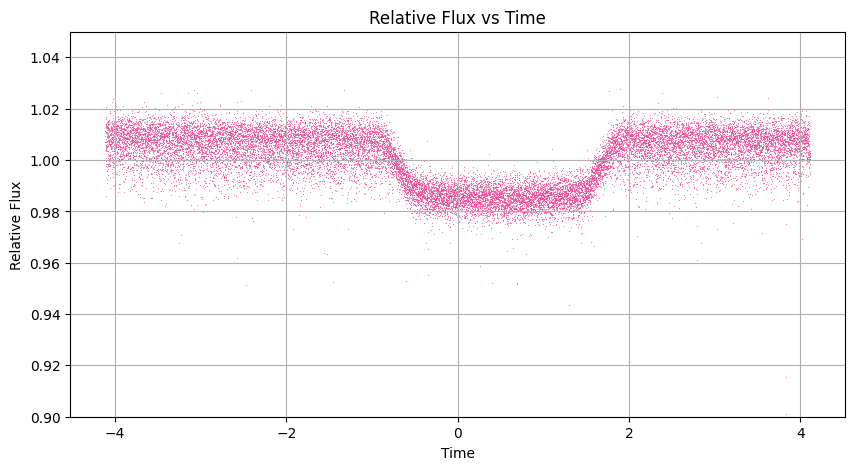

In [13]:
plt.figure(figsize=(10, 5))
plt.scatter(time_hours, row_means, s=3,
    color="#e84393",
    alpha=0.7,
    marker='.',
    linewidths=0)
plt.ylim(0.9, 1.05)
plt.xlabel('Time')
plt.ylabel('Relative Flux')
plt.title('Relative Flux vs Time')
plt.grid(True)
plt.show()

In [27]:
def get_index(target):
    idx = np.argmin(np.abs(time_hours - target))
    print(f"Closest index to {target}:", idx)
    idx = np.where(time_hours == 2)

In [28]:
get_index(-1)
get_index(2)

Closest index to -1: 8136
Closest index to 2: 15976


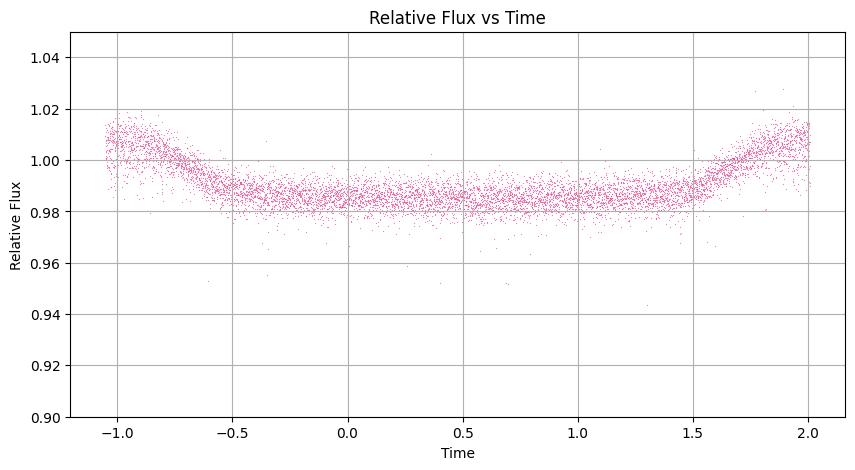

In [18]:
plt.figure(figsize=(10, 5))
plt.scatter(time_hours[8000:16000], row_means[8000:16000],s=3,
    color="#e84393",
    alpha=0.7,
    marker='.',
    linewidths=0)
plt.ylim(0.9, 1.05)
plt.xlabel('Time')
plt.ylabel('Relative Flux')
plt.title('Relative Flux vs Time')
plt.grid(True)
plt.show()

In [32]:
get_index(-0.3)
get_index(1.4)

Closest index to -0.3: 9965
Closest index to 1.4: 14408


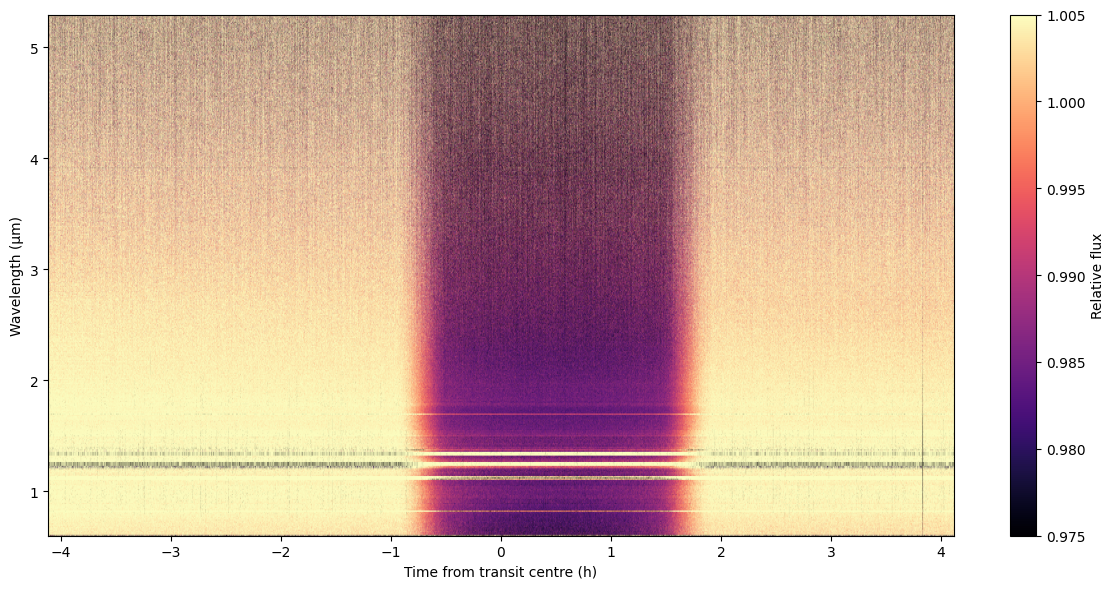

In [33]:
plt.figure(figsize=(12,6))

plt.imshow(
    relative_flux.T,
    aspect='auto',
    cmap='magma',
    origin='lower',
    vmin=0.975,
    vmax=1.005,
    extent=[
        time_hours.min(),     # correct x-axis start
        time_hours.max(),     # correct x-axis end
        wavelengths.min(),    # wavelength min
        wavelengths.max()     # wavelength max
    ]
)

plt.colorbar(label="Relative flux")
plt.xlabel("Time from transit centre (h)")
plt.ylabel("Wavelength (µm)")
plt.tight_layout()
plt.show()


In [34]:
flux_cols = [col for col in df.columns if col.startswith("FLUX_") and col[5:].isdigit()]
wavelength_cols = [col for col in df.columns if col.startswith("WAVELENGTH_") ]
columns_to_keep = wavelength_cols + flux_cols

# Slice rows 10000 to 13000 and keep only desired columns
df_subset = df.loc[10000:14000, columns_to_keep]

In [35]:
df_subset

,WAVELENGTH_13,WAVELENGTH_14,WAVELENGTH_15,WAVELENGTH_16,WAVELENGTH_17,WAVELENGTH_18,WAVELENGTH_19,WAVELENGTH_20,WAVELENGTH_21,WAVELENGTH_22,...,FLUX_412,FLUX_413,FLUX_414,FLUX_415,FLUX_416,FLUX_417,FLUX_418,FLUX_419,FLUX_420,FLUX_421
10000,0.600815,0.605136,0.609545,0.614047,0.618644,0.623338,0.628133,0.633032,0.638038,0.643155,...,0.012189,0.011671,0.011548,0.011411,0.011588,0.011477,0.011565,0.011527,0.011432,0.011298
10001,0.600815,0.605136,0.609545,0.614047,0.618644,0.623338,0.628133,0.633032,0.638038,0.643155,...,0.011949,0.011765,0.011358,0.011631,0.011692,0.011656,0.011082,0.011353,0.010902,0.011244
10002,0.600815,0.605136,0.609545,0.614047,0.618644,0.623338,0.628133,0.633032,0.638038,0.643155,...,0.011940,0.011442,0.011229,0.011001,0.011080,0.011083,0.011278,0.011633,0.011033,0.011141
10003,0.600815,0.605136,0.609545,0.614047,0.618644,0.623338,0.628133,0.633032,0.638038,0.643155,...,0.011916,0.011922,0.011829,0.012286,0.012098,0.012097,0.011190,0.011355,0.011037,0.011749
10004,0.600815,0.605136,0.609545,0.614047,0.618644,0.623338,0.628133,0.633032,0.638038,0.643155,...,0.011395,0.011356,0.011127,0.010818,0.010992,0.011327,0.011605,0.011528,0.010803,0.010939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13996,0.600815,0.605136,0.609545,0.614047,0.618644,0.623338,0.628133,0.633032,0.638038,0.643155,...,0.012218,0.012256,0.012326,0.012332,0.012554,0.012864,0.012506,0.011611,0.011607,0.011104
13997,0.600815,0.605136,0.609545,0.614047,0.618644,0.623338,0.628133,0.633032,0.638038,0.643155,...,0.012164,0.011998,0.011648,0.011925,0.011964,0.011930,0.011543,0.011467,0.011210,0.011516
13998,0.600815,0.605136,0.609545,0.614047,0.618644,0.623338,0.628133,0.633032,0.638038,0.643155,...,0.012227,0.011394,0.011353,0.011192,0.011939,0.011510,0.011620,0.011476,0.011864,0.011532
13999,0.600815,0.605136,0.609545,0.614047,0.618644,0.623338,0.628133,0.633032,0.638038,0.643155,...,0.011613,0.011736,0.011611,0.011871,0.011773,0.012341,0.011346,0.011892,0.011678,0.011438


In [36]:
df_subset.to_csv("subset_flux.csv")